In [35]:
import torch
from torch import nn
from torchmetrics.classification import BinaryAccuracy
import matplotlib.pyplot as plt

In [36]:
import sklearn
from sklearn.datasets import make_circles

In [37]:
n_samples = 1000

X, y = make_circles(n_samples, noise=0.03, random_state=42)

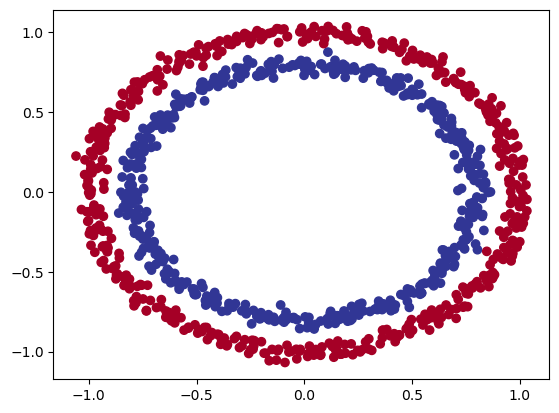

In [38]:
plt.scatter(x=X[:, 0], y=X[:, 1], c=y, cmap=plt.cm.RdYlBu)
plt.show()

In [39]:
device = 'mps' if torch.mps.is_available else 'cpu'
device

'mps'

In [40]:
from sklearn.model_selection import train_test_split

In [41]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [42]:
X_train = torch.tensor(X_train, dtype=torch.float).to(device)
X_test = torch.tensor(X_test, dtype=torch.float).to(device)
y_train = torch.tensor(y_train, dtype=torch.float).to(device)
y_test = torch.tensor(y_test, dtype=torch.float).to(device)

In [43]:
class Network1(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(in_features=2, out_features=8)
        self.fc2 = nn.Linear(in_features=8, out_features=16)
        self.fc3 = nn.Linear(in_features=16, out_features=8)
        self.fc4 = nn.Linear(in_features=8, out_features=1)
        self.relu = nn.ReLU()
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        return self.sigmoid(self.fc4(self.relu(self.fc3(self.relu(self.fc2(self.relu(self.fc1(x))))))))
    
model_1 = Network1().to(device)
model_1

Network1(
  (fc1): Linear(in_features=2, out_features=8, bias=True)
  (fc2): Linear(in_features=8, out_features=16, bias=True)
  (fc3): Linear(in_features=16, out_features=8, bias=True)
  (fc4): Linear(in_features=8, out_features=1, bias=True)
  (relu): ReLU()
  (sigmoid): Sigmoid()
)

In [46]:
criterion = nn.BCELoss()
optimizer = torch.optim.Adam(model_1.parameters(), lr=0.01)
acc = BinaryAccuracy().to(device)

In [47]:
torch.manual_seed(42)
torch.mps.manual_seed(42)

epochs = 500

for epoch in range(epochs):
    model_1.train()
    y_preds = model_1(X_train).squeeze()
    loss = criterion(y_preds, y_train)
    train_acc = acc(y_preds, y_train)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    model_1.eval()
    with torch.inference_mode():
        y_preds_test = model_1(X_test).squeeze()
        test_loss = criterion(y_preds_test, y_test)
        test_acc = acc(y_preds_test, y_test)

    if epoch%50 == 0:
        print(
            f"Epoch {epoch} | Loss {loss:.4f} | Accuracy {train_acc:.4f} | Test Loss {test_loss:.4f} | Test Accuracy {test_acc:.4f}")

Epoch 0 | Loss 0.7043 | Accuracy 0.5000 | Test Loss 0.7022 | Test Accuracy 0.5000
Epoch 50 | Loss 0.2463 | Accuracy 0.9688 | Test Loss 0.2576 | Test Accuracy 0.9500
Epoch 100 | Loss 0.0057 | Accuracy 1.0000 | Test Loss 0.0171 | Test Accuracy 1.0000
Epoch 150 | Loss 0.0025 | Accuracy 1.0000 | Test Loss 0.0120 | Test Accuracy 1.0000
Epoch 200 | Loss 0.0015 | Accuracy 1.0000 | Test Loss 0.0106 | Test Accuracy 0.9950
Epoch 250 | Loss 0.0010 | Accuracy 1.0000 | Test Loss 0.0098 | Test Accuracy 0.9950
Epoch 300 | Loss 0.0008 | Accuracy 1.0000 | Test Loss 0.0093 | Test Accuracy 0.9950
Epoch 350 | Loss 0.0006 | Accuracy 1.0000 | Test Loss 0.0089 | Test Accuracy 0.9950
Epoch 400 | Loss 0.0005 | Accuracy 1.0000 | Test Loss 0.0087 | Test Accuracy 0.9950
Epoch 450 | Loss 0.0004 | Accuracy 1.0000 | Test Loss 0.0085 | Test Accuracy 0.9950
